In [ ]:
from google.colab import drive
import os
drive.mount("/content/drive")

os.chdir("/content/drive/MyDrive/ENPM808W DATA SCIENCE/")

Mounted at /content/drive


In [ ]:
!pip install shap
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 39.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 40.4 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=7c0faec32e58a27b44858528aa225b12887a4349bb3a2ac47b0235776501fd5a
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import r2_score
from sklearn import linear_model
from google.colab import drive
import os
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from joblib import dump, load
import lime
from lime import lime_tabular
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from matplotlib.legend_handler import HandlerLine2D
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
path="./final project/Data/"
X_train = pd.read_csv(path+"X_train.csv")
X_test = pd.read_csv(path+"X_test.csv")

y_train = pd.read_csv(path+"y_train.csv")
y_test = pd.read_csv(path+"y_test.csv")

test_cleaned=pd.read_csv(path+"test_cleaned.csv")
X = pd.read_csv(path+"X.csv")

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

feature_list = []
for i in X_train.columns:
  feature_list.append(i)


(27716, 10) (13652, 10) (27716, 1) (13652, 1)


## Modelling

Try all of algoritms, trying to get the best model.

In [ ]:
models=[  LinearRegression(),SVC(),tree.DecisionTreeClassifier(),xgb.XGBRegressor(),linear_model.LassoLars(alpha=.1, normalize=False),RandomForestRegressor()]
results={}
best_model=None
best_score=0


In [ ]:
for x in models:
    x.fit(X_train, y_train.values.ravel())
    pred_after=x.predict(X_test)
    acc=r2_score(y_test,pred_after)
    if acc>best_score: 
        best_score=acc
        best_model=x
    results[str(x)]=acc
    print('model=',x,'acc=',acc)


model= LinearRegression() acc= 0.508110658029322
model= SVC() acc= -0.005338179525890219
model= DecisionTreeClassifier() acc= 0.6780201304573822
[01:14:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model= XGBRegressor() acc= 0.7859740980575589
model= LassoLars(alpha=0.1, normalize=False) acc= 0.5062524933440946
model= RandomForestRegressor() acc= 0.8242357556190082


In [ ]:
results=sorted(results.items(), key=lambda item: item[1],reverse=True)
results=pd.DataFrame(results)
results

,0,1
0,RandomForestRegressor(),0.824236
1,XGBRegressor(),0.785974
2,DecisionTreeClassifier(),0.678020
3,LinearRegression(),0.508111
4,"LassoLars(alpha=0.1, normalize=False)",0.506252
5,SVC(),-0.005338


RandomForestRegressor() shows to be the best.

Trying to get the best stoping point of max depth for RandomForestRegressor()

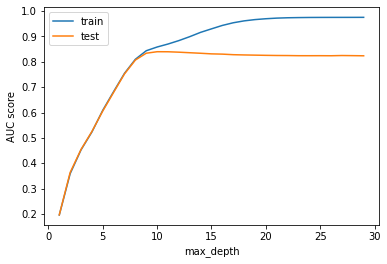

In [ ]:



max_depths = [x for x in range(1,30,1)]
train_results = []
test_results = []
for max_depth in max_depths:
   model = RandomForestRegressor(max_depth=max_depth)
   model.fit(X_train, y_train.values.ravel())
   train_pred = model.predict(X_train)
   roc_auc=r2_score(y_train,train_pred)
   train_results.append(roc_auc)
   # Add auc score to previous train results
   
   y_pred = model.predict(X_test)
   roc_auc=r2_score(y_test,y_pred)
   test_results.append(roc_auc)
   # Add auc score to previous test results

line1= plt.plot(max_depths, train_results)
line2= plt.plot(max_depths, test_results)
plt.legend(["train", "test"])

plt.ylabel("AUC score")
plt.xlabel("max_depth")
plt.show()

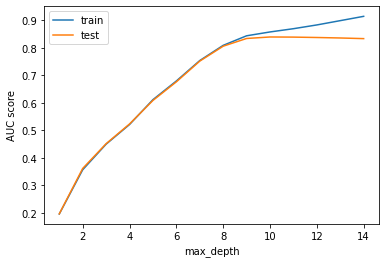

In [ ]:

max_depths =  [x for x in range(1,15,1)]
train_results = []
test_results = []
for max_depth in max_depths:
   model = RandomForestRegressor(max_depth=max_depth)
   model.fit(X_train, y_train.values.ravel())
   train_pred = model.predict(X_train)
   roc_auc=r2_score(y_train,train_pred)
   train_results.append(roc_auc)
   # Add auc score to previous train results
   
   y_pred = model.predict(X_test)
   roc_auc=r2_score(y_test,y_pred)
   test_results.append(roc_auc)
   # Add auc score to previous test results

line1= plt.plot(max_depths, train_results)
line2= plt.plot(max_depths, test_results)
plt.legend(["train", "test"])

plt.ylabel("AUC score")
plt.xlabel("max_depth")
plt.show()

The max depth should be around 10.

In [ ]:
param_grid ={"n_estimators":[x for x in range(5,10,1)],
      'max_depth': [8,9,10],
      'max_features': ['auto', 'sqrt'],
      "min_samples_split":[1, 2, 4],
       "min_samples_leaf":[2, 5, 10]
       }
forest_regressor=RandomForestRegressor()
from sklearn.metrics import r2_score
grid=GridSearchCV(forest_regressor,param_grid)

grid_results=grid.fit(X_train,y_train.values.ravel())






450 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "/usr/local/lib/python3.8/dist-pa

In [ ]:

print(  r2_score(y_test, grid_results.best_estimator_.predict(X_test))  ,"\n",grid_results.best_params_)
best_model=grid_results.best_estimator_


0.8374879403202455 
 {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 9}


In [ ]:
dump(best_model, path+'best_model.joblib') 


['./final project/Data/best_model.joblib']

predict testing


In [ ]:
test_cleaned.head().T


,0,1,2,3,4
Delivery_person_Age,28.000000,23.000000,21.000000,31.000000,26.00000
Delivery_person_Ratings,4.600000,4.500000,4.800000,4.600000,4.70000
label_Weatherconditions,5.000000,3.000000,1.000000,4.000000,1.00000
label_Road_traffic_density,3.000000,3.000000,1.000000,1.000000,0.00000
Vehicle_condition,0.000000,0.000000,1.000000,2.000000,0.00000
label_Type_of_order,3.000000,1.000000,2.000000,1.000000,1.00000
label_Type_of_vehicle,1.000000,1.000000,2.000000,2.000000,1.00000
label_City,0.000000,0.000000,0.000000,0.000000,0.00000
multiple_deliveries,1.000000,1.000000,1.000000,1.000000,1.00000
Geo_distance,17.042985,13.390474,13.397932,17.042634,1.54106


In [ ]:
output=best_model.predict(test_cleaned)
output=pd.DataFrame(output)


In [ ]:
output.to_csv(path+'test_predicts.csv',index=True)